In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Find features and Target

In [4]:
X = df.iloc[:,2:4]
y = df.iloc[:,-1]

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

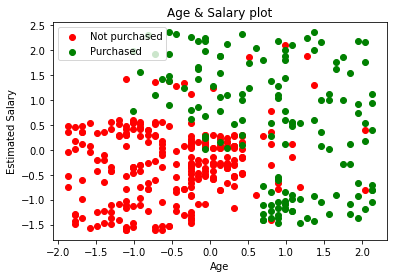

In [6]:
plt.scatter(X[y==0,0],X[y==0,1],color="red",label="Not purchased")
plt.scatter(X[y==1,0],X[y==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Age & Salary plot")
plt.show()

# Train test spliting

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.75,random_state=50)

# Choose number of K

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
acc = []
for i in range(1,11):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    cm = accuracy_score(y_test,y_pred)
    acc.append(cm)

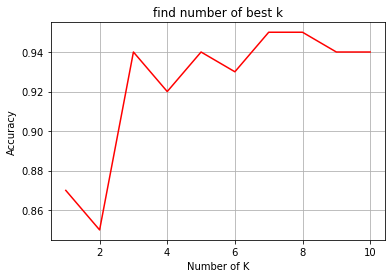

In [27]:
plt.plot(range(1,11),acc,color="red")
plt.grid()
plt.xlabel("Number of K")
plt.ylabel("Accuracy")
plt.title("find number of best k")
plt.show()

# KNN Model Fitting

Sciket-Learn (sklearn): data preprocessing, algorithm creation, testing

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred = knn_model.predict(X_test)

# Accuracy Testing

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test,y_pred)

0.95

In [31]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[69,  1],
       [ 4, 26]], dtype=int64)

In [32]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        70
           1       0.96      0.87      0.91        30

    accuracy                           0.95       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100



# ROC & AUC Curve

In [34]:
from sklearn.metrics import auc,roc_curve


In [36]:
fpr,tpr,thresh = roc_curve(y_test,y_pred)

In [57]:
acc = auc(fpr,tpr)

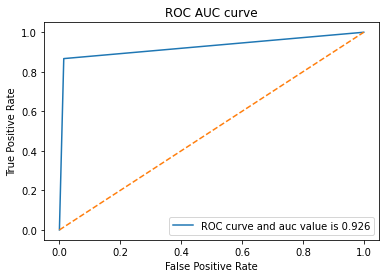

In [59]:
plt.plot(fpr,tpr,label="ROC curve and auc value is %0.3f"%acc)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC curve")
plt.legend()
plt.show()

# Model Visualization

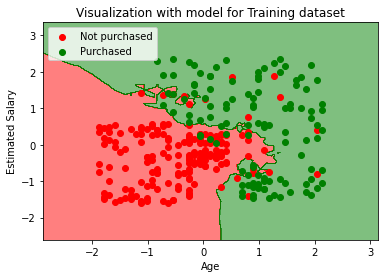

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, knn_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Training dataset")
plt.show()

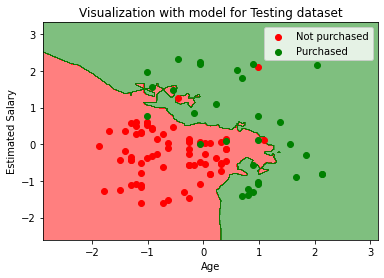

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, knn_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Testing dataset")
plt.show()

# User Testing

test with new user: age is 30 year old, and salary is 60000;

find out that customer have a car or not

and a function for that